In [44]:
import numpy as np
import pydicom as dcm
import matplotlib.pyplot as plt
from PIL import Image

In [45]:
## load in dicom image data
test_dcm = dcm.dcmread("../sample_data/test.dcm")

In [46]:
test_dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.45.1.7.4.250977676261436.23040317252900189.19681
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.5
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_365'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.45.1.7.4.250977676261436.23040317252900189.19681
(0008, 0020) Study Date           

In [47]:
## load dicom image instance
test_img = test_dcm.pixel_array

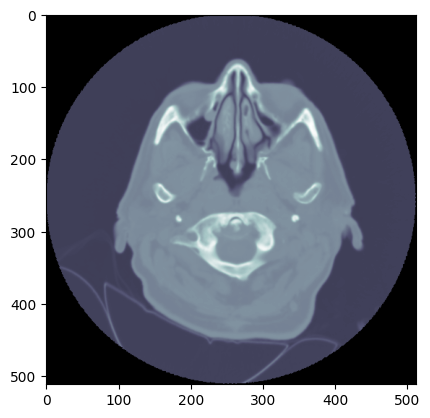

In [48]:
## view dicom image in Bone Window
plt.imshow(test_img, cmap=plt.cm.bone)

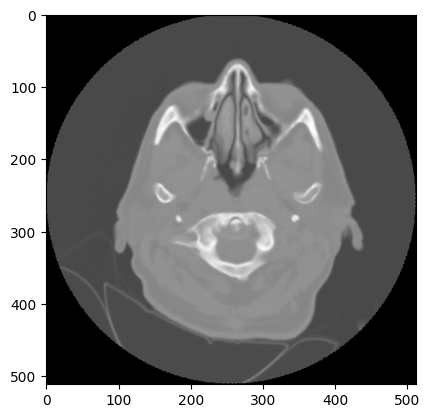

In [49]:
## visualize dicom image instance in gray colormap
plt.imshow(test_img, cmap=plt.cm.gray)

In [50]:
# Function to take care of teh translation and windowing. 
def window_image(img, window_center, window_width, intercept, slope, rescale=True):
    img = (img*slope +intercept) #for translation adjustments given in the dicom file. 
    img_min = window_center - window_width//2 #minimum HU level
    img_max = window_center + window_width//2 #maximum HU level
    img[img<img_min] = img_min #set img_min for all HU levels less than minimum HU level
    img[img>img_max] = img_max #set img_max for all HU levels higher than maximum HU level
    if rescale: 
        img = (img - img_min) / (img_max - img_min)*255.0 
    return img
    
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == dcm.multival.MultiValue: return int(x[0])
    else: return int(x)
    
def get_windowing(data):
    dicom_fields = [
        data.WindowCenter, #window center
        data.WindowWidth, #window width
        data.RescaleIntercept, #intercept
        data.RescaleSlope   #slope
    ] 
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]

In [51]:
window_center , window_width, intercept, slope = get_windowing(test_dcm)
window_center , window_width, intercept, slope

(40, 120, 0, 1)

In [52]:
test_win_img = window_image(test_img, window_center, window_width, intercept, slope, rescale=True)

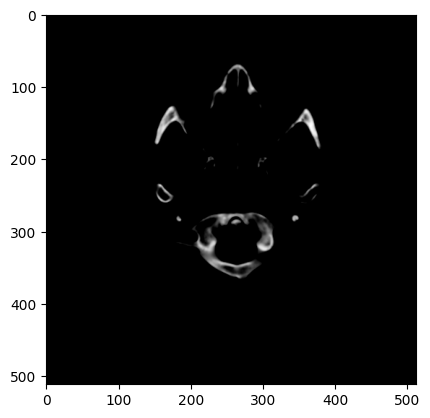

In [57]:
plt.imshow(test_win_img, cmap=plt.cm.gray)

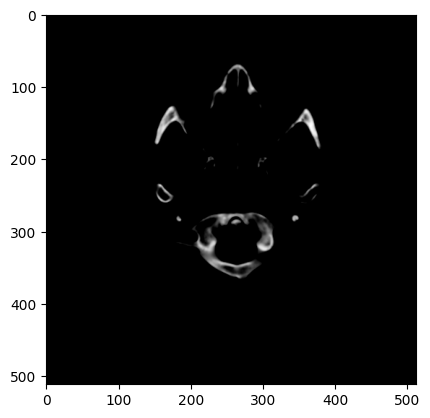

In [58]:
## manually adjust the window rage to visualize the image in bone window
window_center , window_width, intercept, slope = 300, 1500, -1024, 1
test_win_img = window_image(test_img, window_center, window_width, intercept, slope, rescale=True)
plt.imshow(test_win_img, cmap=plt.cm.gray)